# Solution of Fisher Equation using Finite Difference Method

**Date:** 19-02-2015  
**Author:** @shachi  

## Introduction  
This notebook provides the numerical solution of the **Fisher equation** using the **finite difference method**. The equation is a **partial differential equation (PDE)** with a **nonlinear term** and is given by:  

$$ \frac{\partial c}{\partial t} = \mu c(1-c) + D \frac{\partial^2 c}{\partial x^2} $$

### Discretization Approach  
- **Time and Space Discretization:**  
  - The domain is discretized into **Nx** points along the **x-axis**.  
  - The equation is solved iteratively over **Nt** time steps.  
- **Boundary Conditions:**  
  - **Left boundary condition:** \( c(0,t) = 1 \)  
  - **Right boundary condition:** \( c(L,t) = 0 \)  
- **Initial Condition:**  
  - \( c(x,0) \) is initialized to 0 everywhere except at \( x = 0 \), where \( c(0,0) = 1 \).  

This method helps us track the **propagation of a traveling wave** in the Fisher equation.


# Python Code 

gamma1= 0.020000
gamma2= 0.200000
dx = 0.100000
dt = 0.020000


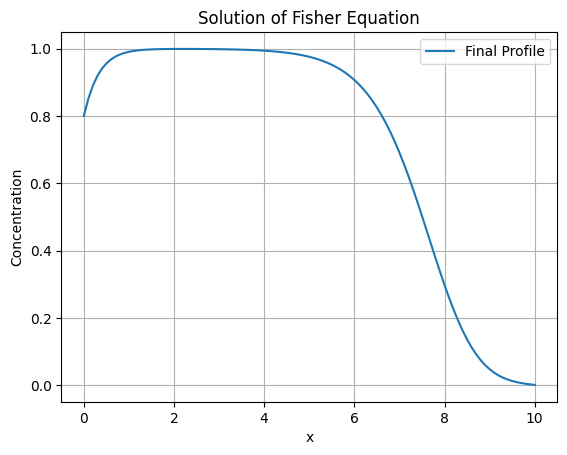

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = 20.0
L = 10.0
Nt = 1000  # No of discrete points on time axis 
Nx = 100   # No of discrete points on X axis
dx = L / Nx  # Not a periodic boundary condition
dt = T / Nt
D = 0.10
du = 1.00
gamma1 = du * dt
gamma2 = (D * dt) / dx**2  # FOR Convergence: gamma1 & gamma2 <= 0.5

print(f'gamma1= {gamma1:.6f}')
print(f'gamma2= {gamma2:.6f}')
print(f'dx = {dx:.6f}')
print(f'dt = {dt:.6f}')

# Allocate arrays
co = np.zeros(Nx + 2)  # Extra points for boundary conditions
cn = np.zeros(Nx + 2)

# Initial value of concentration
co[0] = 0.8  # Delta function at x=0 at initial time
cn[0] = 0.8

time = 0.0
T = 15.0  # We get the plot after time T

# Time-stepping loop
do_run = True
while time <= T:
    # Boundary conditions
    co[Nx + 1] = 0.0
    #co[0] = 1.0
    
    # Update using finite difference method
    for i in range(1, Nx + 1):
        cn[i] = co[i] + gamma1 * co[i] * (1 - co[i]) + gamma2 * (co[i + 1] - 2 * co[i] + co[i - 1])
    
    co = cn.copy()
    time += dt

# Save results to file
with open('Fisher1.txt', 'w') as f:
    for k in range(Nx + 1):
        f.write(f'{k * dx:.8f} {cn[k]:.8f}\n')

# Optional: Plot the final concentration profile
plt.plot(np.linspace(0, L, Nx + 1), cn[:Nx + 1], label='Final Profile')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.title('Solution of Fisher Equation')
plt.legend()
plt.grid()
plt.show()

# Run Gnuplot for visualization (ensure Gnuplot is installed)
#import os
#os.system('gnuplot -p Fisher.gnu')


gamma1= 0.020000
gamma2= 0.200000
dx = 0.100000
dt = 0.020000


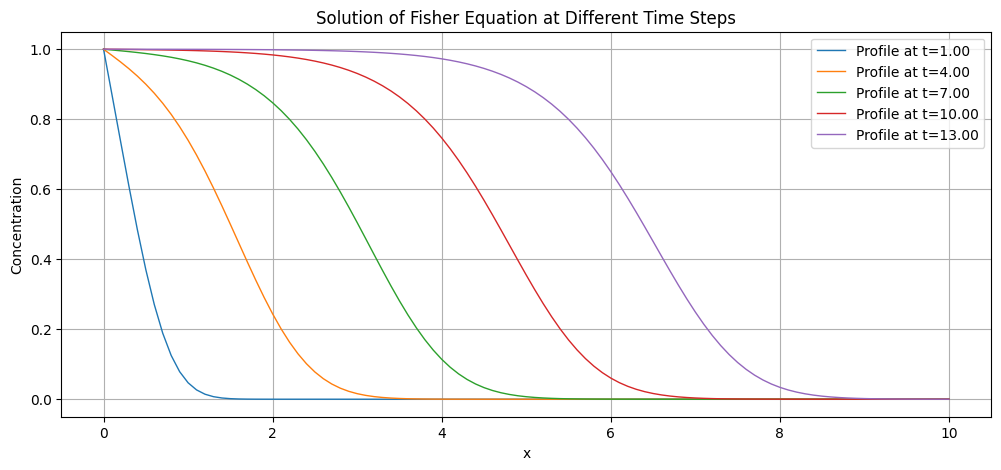

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = 20.0
L = 10.0
Nt = 1000  # No of discrete points on time axis 
Nx = 100   # No of discrete points on X axis
dx = L / Nx  # Not a periodic boundary condition
dt = T / Nt
D = 0.10
mu = 1.00
gamma1 = mu * dt
gamma2 = (D * dt) / dx**2  # FOR Convergence: gamma1 & gamma2 <= 0.5

print(f'gamma1= {gamma1:.6f}')
print(f'gamma2= {gamma2:.6f}')
print(f'dx = {dx:.6f}')
print(f'dt = {dt:.6f}')

# Allocate arrays
co = np.zeros(Nx + 2)  # Extra points for boundary conditions
cn = np.zeros(Nx + 2)

# Initial value of concentration
co[0] = 1.0  # Delta function at x=0 at initial time
cn[0] = 1.0

time = 0.0
T = 20.0  # We get the plot after time T

# Plotting times
plot_times = [1,4, 7, 10,13]

# Create a single figure
fig, ax = plt.subplots(figsize=(12, 5))

for pt in plot_times:  
    while time <= pt:
        co[Nx + 1] = 0.0
        co[0] = 1.0

        for i in range(1, Nx + 1):
            cn[i] = co[i] + gamma1 * co[i] * (1 - co[i]) + gamma2 * (co[i + 1] - 2 * co[i] + co[i - 1])

        co[:] = cn[:]
        time += dt

    ax.plot(np.linspace(0, L, Nx + 1), cn[:Nx + 1], label=f'Profile at t={pt:.2f}', lw=1)

# Final plot settings
ax.legend()  # Ensure legend appears
ax.set_xlabel('x')
ax.set_ylabel('Concentration')
ax.set_title('Solution of Fisher Equation at Different Time Steps')
ax.grid()

plt.show()


In [12]:
import os
os.system('gnuplot -p Fisher.gnu')

0

## The analytical solution of the Fisher equation is given by:

$$ c(x,t) = \frac{1}{1 + e^{\lambda (x - vt)}} $$
$$  \lambda = \sqrt \frac{\mu}{D} $$
$$  v = 2 \sqrt{\mu D}  $$

gamma1= 0.020000
gamma2= 0.200000
dx = 0.100000
dt = 0.020000


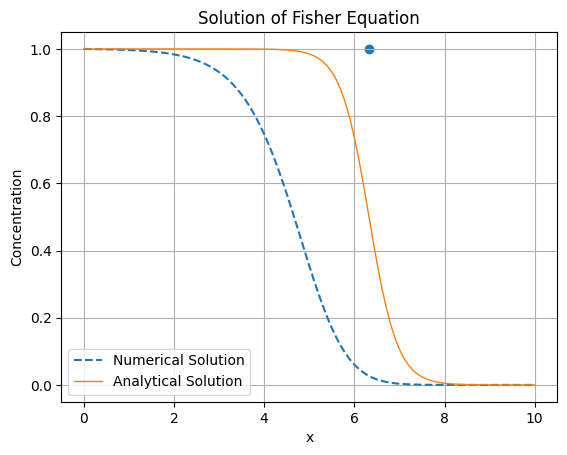

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
T = 20.0
L = 10.0
Nt = 1000  # No of discrete points on time axis 
Nx = 100   # No of discrete points on X axis
dx = L / Nx  # Not a periodic boundary condition
dt = T / Nt
D = 0.10
mu = 1.00
gamma1 = mu * dt
gamma2 = (D * dt) / dx**2  # FOR Convergence: gamma1 & gamma2 <= 0.5

print(f'gamma1= {gamma1:.6f}')
print(f'gamma2= {gamma2:.6f}')
print(f'dx = {dx:.6f}')
print(f'dt = {dt:.6f}')

# Allocate arrays
co = np.zeros(Nx + 2)  # Extra points for boundary conditions
cn = np.zeros(Nx + 2)

# Initial value of concentration
co[0] = 1.0  # Delta function at x=0 at initial time
cn[0] = 1.0

# Analytical solution parameters
v = 2 * np.sqrt(D * mu)
lam = np.sqrt(mu / D)

T = 10.0
# Time-stepping loop
time = 0.0
while time <= T:
    # Boundary conditions
    co[Nx + 1] = 0.0
    co[0] = 1.0
    # Update using finite difference method
    for i in range(1, Nx + 1):
        cn[i] = co[i] + gamma1 * co[i] * (1 - co[i]) + gamma2 * (co[i + 1] - 2 * co[i] + co[i - 1])
    co = cn.copy()
    time += dt

# Save results to file
with open('Fisher1.txt', 'w') as f:
    for k in range(Nx + 1):
        f.write(f'{k * dx:.8f} {cn[k]:.8f}\n')

# Generate x values for plotting
x_vals = np.linspace(0, L, Nx + 1)

# Compute analytical solution at final time
c_analytic = 1 / (1 + np.exp(lam * (x_vals - v * T)))

# Plot numerical and analytical solutions
plt.scatter(v*T , 1)
plt.plot(x_vals, cn[:Nx + 1], label='Numerical Solution', linestyle='--')
plt.plot(x_vals, c_analytic, label='Analytical Solution', linestyle='-', linewidth=1)
plt.xlabel('x')
plt.ylabel('Concentration')
plt.title('Solution of Fisher Equation')
plt.legend()
plt.grid()
plt.show()
